<a href="https://colab.research.google.com/github/mumumu99/Fashion_MNIST_Classification/blob/main/Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#라이프러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import random

#랜덤 시드 고정
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

#구글드라이브 폴더 마운트
from google.colab import drive, files
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
#CSV 파일 읽어오기
drive_path = "/gdrive/MyDrive/"
train = pd.read_csv(drive_path + "mnist_data/train.csv")
test = pd.read_csv(drive_path + "mnist_data/test.csv")
submission = pd.read_csv(drive_path + "mnist_data/sample_submission.csv")

train.shape, test.shape, submission.shape

((60000, 786), (10000, 785), (10000, 2))

In [3]:
#train 데이터 보기
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [4]:
#train 데이터 28*28 이미지로 변환
train_images = train.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
train_images.shape

(60000, 28, 28)

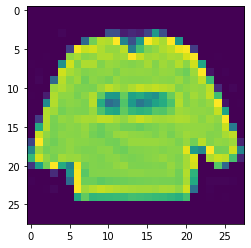

In [5]:
#첫 번째 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(train_images[0]);

In [6]:
#목표 레이블
y_train = train.loc[:, 'label']
y_train.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [7]:
#숫자 레이블을 실제 레이블과 연결하여 확인
target_values = {0:'T-shirt/top',
                 1:'Trouser',
                 2:'Pullover',
                 3:'Dress',
                 4:'Coat',
                 5:'Sandal',
                 6:'Shirt',
                 7:'Sneeker',
                 8:'Bag',
                 9:'Ankel boot'}
print(y_train[0])
print(target_values[y_train[0]])

2
Pullover


In [8]:
#test 데이터 28*28 이미지로 변환
test_images = test.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
test_images.shape

(10000, 28, 28)

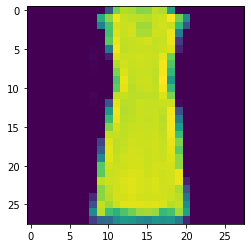

In [9]:
#500번째 test 이미지
plt.imshow(test_images[499])

In [10]:
#피처 스케일 맞추기
X_train = train_images / 255.
X_test = test_images / 255.
print("최소값:", X_train[0].min())
print("최대값:", X_train[0].max())

최소값: 0.0
최대값: 1.0


In [11]:
#채널 차원 추가
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
#Train-Validation 데이터 구분
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                            stratify=y_train,
                                            shuffle=True, random_state=SEED)
print("학습 데이터셋 크기:", x_tr.shape, y_tr.shape)
print("검증 데이터셋 크기:", x_val.shape, y_val.shape)

학습 데이터셋 크기: (48000, 28, 28, 1) (48000,)
검증 데이터셋 크기: (12000, 28, 28, 1) (12000,)


In [13]:
#MLP 모델 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=[28, 28]))
mlp_model.add(Dense(units=64, activation='relu'))
mlp_model.add(Dense(units=10, activation='softmax'))

mlp_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
mlp_history = mlp_model.fit(x_tr, y_tr, batch_size=64, epochs=20,
                    validation_data=(x_val, y_val),
                    verbose=2)

Epoch 1/20
750/750 - 4s - loss: 0.5735 - acc: 0.8021 - val_loss: 0.4506 - val_acc: 0.8426
Epoch 2/20
750/750 - 1s - loss: 0.4224 - acc: 0.8495 - val_loss: 0.4086 - val_acc: 0.8578
Epoch 3/20
750/750 - 1s - loss: 0.3868 - acc: 0.8620 - val_loss: 0.3947 - val_acc: 0.8612
Epoch 4/20
750/750 - 1s - loss: 0.3618 - acc: 0.8704 - val_loss: 0.3895 - val_acc: 0.8607
Epoch 5/20
750/750 - 1s - loss: 0.3449 - acc: 0.8758 - val_loss: 0.3753 - val_acc: 0.8690
Epoch 6/20
750/750 - 1s - loss: 0.3283 - acc: 0.8806 - val_loss: 0.3484 - val_acc: 0.8783
Epoch 7/20
750/750 - 1s - loss: 0.3167 - acc: 0.8856 - val_loss: 0.3467 - val_acc: 0.8789
Epoch 8/20
750/750 - 1s - loss: 0.3049 - acc: 0.8901 - val_loss: 0.3495 - val_acc: 0.8737
Epoch 9/20
750/750 - 1s - loss: 0.2957 - acc: 0.8927 - val_loss: 0.3452 - val_acc: 0.8788
Epoch 10/20
750/750 - 1s - loss: 0.2891 - acc: 0.8948 - val_loss: 0.3831 - val_acc: 0.8703
Epoch 11/20
750/750 - 1s - loss: 0.2789 - acc: 0.8985 - val_loss: 0.3443 - val_acc: 0.8807
Epoch 12

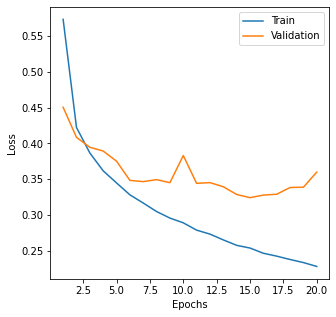

In [15]:
#손실 함수 그래프
def plot_loss_curve(history, total_epoch=10, start=1):
  plt.figure(figsize=(5, 5))
  plt.plot(range(start, total_epoch + 1),
           history.history['loss'][start-1:total_epoch],
           label='Train')
  plt.plot(range(start, total_epoch + 1),
           history.history['val_loss'][start-1:total_epoch],
           label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

plot_loss_curve(history=mlp_history, total_epoch=20, start=1)

In [16]:
#CNN 모델 학습
from tensorflow.keras.layers import Conv2D, MaxPooling2D
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3),
                     activation='relu', input_shape=[28, 28, 1]))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                173120    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
_________________________________________________________________


In [17]:
cnn_history = cnn_model.fit(x_tr, y_tr, batch_size=64, epochs=20,
                    validation_data=(x_val, y_val),
                    verbose=2)

Epoch 1/20
750/750 - 31s - loss: 0.4936 - acc: 0.8275 - val_loss: 0.3732 - val_acc: 0.8670
Epoch 2/20
750/750 - 1s - loss: 0.3334 - acc: 0.8817 - val_loss: 0.3091 - val_acc: 0.8927
Epoch 3/20
750/750 - 1s - loss: 0.2894 - acc: 0.8973 - val_loss: 0.3006 - val_acc: 0.8934
Epoch 4/20
750/750 - 1s - loss: 0.2606 - acc: 0.9067 - val_loss: 0.2851 - val_acc: 0.8963
Epoch 5/20
750/750 - 1s - loss: 0.2386 - acc: 0.9149 - val_loss: 0.2886 - val_acc: 0.8998
Epoch 6/20
750/750 - 1s - loss: 0.2198 - acc: 0.9212 - val_loss: 0.2665 - val_acc: 0.9043
Epoch 7/20
750/750 - 1s - loss: 0.2003 - acc: 0.9276 - val_loss: 0.2652 - val_acc: 0.9047
Epoch 8/20
750/750 - 1s - loss: 0.1838 - acc: 0.9334 - val_loss: 0.2565 - val_acc: 0.9074
Epoch 9/20
750/750 - 1s - loss: 0.1709 - acc: 0.9388 - val_loss: 0.2515 - val_acc: 0.9137
Epoch 10/20
750/750 - 1s - loss: 0.1605 - acc: 0.9417 - val_loss: 0.2586 - val_acc: 0.9095
Epoch 11/20
750/750 - 1s - loss: 0.1488 - acc: 0.9456 - val_loss: 0.2611 - val_acc: 0.9147
Epoch 1

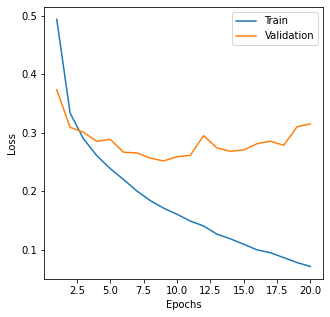

In [18]:
plot_loss_curve(history=cnn_history, total_epoch=20, start=1)

In [19]:
#과대적합 방지
from tensorflow.keras.layers import Dropout
def build_cnn():
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=(3, 3),
                   activation='relu', input_shape=[28, 28, 1]))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(units=64, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(units=10, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

cnn_model = build_cnn()
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                173120    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
________________________________________________

In [20]:
cnn_history = cnn_model.fit(x_tr, y_tr, batch_size=64, epochs=20,
                    validation_data=(x_val, y_val),
                    verbose=2)

Epoch 1/20
750/750 - 2s - loss: 0.6783 - acc: 0.7632 - val_loss: 0.3963 - val_acc: 0.8597
Epoch 2/20
750/750 - 1s - loss: 0.4605 - acc: 0.8389 - val_loss: 0.3353 - val_acc: 0.8775
Epoch 3/20
750/750 - 1s - loss: 0.4030 - acc: 0.8578 - val_loss: 0.3143 - val_acc: 0.8882
Epoch 4/20
750/750 - 1s - loss: 0.3729 - acc: 0.8693 - val_loss: 0.2975 - val_acc: 0.8929
Epoch 5/20
750/750 - 1s - loss: 0.3477 - acc: 0.8761 - val_loss: 0.2869 - val_acc: 0.8980
Epoch 6/20
750/750 - 1s - loss: 0.3335 - acc: 0.8823 - val_loss: 0.2910 - val_acc: 0.8935
Epoch 7/20
750/750 - 1s - loss: 0.3165 - acc: 0.8869 - val_loss: 0.2762 - val_acc: 0.9007
Epoch 8/20
750/750 - 1s - loss: 0.3070 - acc: 0.8889 - val_loss: 0.2665 - val_acc: 0.9042
Epoch 9/20
750/750 - 1s - loss: 0.2979 - acc: 0.8925 - val_loss: 0.2666 - val_acc: 0.9018
Epoch 10/20
750/750 - 1s - loss: 0.2861 - acc: 0.8965 - val_loss: 0.2667 - val_acc: 0.9048
Epoch 11/20
750/750 - 1s - loss: 0.2798 - acc: 0.8982 - val_loss: 0.2667 - val_acc: 0.9026
Epoch 12

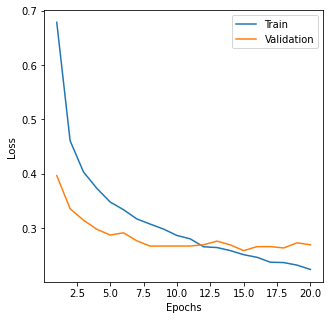

In [21]:
plot_loss_curve(history=cnn_history, total_epoch=20, start=1)

In [22]:
#리더보드 제출
y_pred_proba = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=-1)
submission['label'] = y_pred_classes
submission_filepath = drive_path + 'mnist_data/mnist_cnn_submission1.csv'
submission.to_csv(submission_filepath, index=False)